<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>


## Homework 2: k-NN Regression

**Clemson University**<br>
**Fall 2021**<br>
**Instructor(s):** Nina Hubig <br>


---



In [1]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

---

In this homework, we will explore regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York City at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `nyc_taxi.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

<div class="theme"> Question 1 </div>

<div class="exercise"> <b> Question 1.1 </b> Use pandas to load the dataset from the csv file `nyc_taxi.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set data frame as `train_data` and your test set data frame as `test_data`.</div>

In [3]:
# Your code here
nyc_taxi = pd.read_csv(r'C:\Users\singh\Desktop\Fall21\AppliedDS\nyc_taxi.csv')

df = pd.DataFrame(nyc_taxi)
df.shape
#df.head()

(1250, 2)

In [4]:
df.head()

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0


In [5]:
train_data, test_data = train_test_split(nyc_taxi, test_size=0.2, random_state=42)

In [6]:
test_data.head()

,TimeMin,PickupCount
680,436.0,24.0
1102,408.0,9.0
394,1189.0,51.0
930,139.0,66.0
497,756.0,15.0


<div class="exercise"> <b> Question 1.2 </b> Generate a scatter plot of the training data points with clear labels on the x and y axes to demonstrate how the number of taxi pickups is dependent on the time of the day.  Always be sure to title your plot.</div>

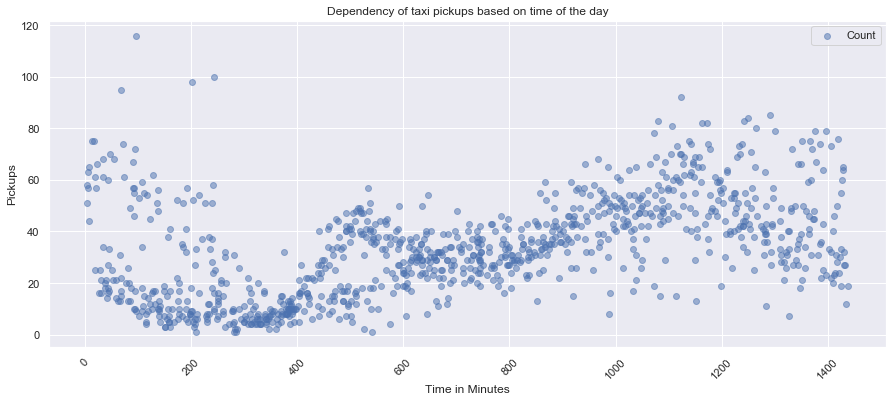

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15,6))

ax.scatter(train_data.TimeMin, train_data.PickupCount, 
           label='Count', alpha=0.5)
ax.set_title('Dependency of taxi pickups based on time of the day')
ax.set_xlabel('Time in Minutes')
ax.set_ylabel('Pickups')

ax.tick_params(axis='x', labelrotation=45)
ax.legend();

In [8]:
# Your code here

<div class="exercise"> <b> Question 1.3 </b> In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result. </div>

There is a gradual rise in the pickup count throughout the graph.
Data points are accumulated(closely packed) for the time in range(200-400), whereas the points starts to scatter more as we keep reaching the end of the day. The data points are scattered the most for the time in range(1100-1440).
This is reasonable as less data quantity is available for the night timings compared to the day timings as these are the busiest times for the day.

<div class="exercise"> <b> Question 1.4 </b> You should see a <i>hole</i> in the scatter plot when `TimeMin` is 500-550 minutes and `PickupCount` is roughly 20-30 pickups.  Briefly surmise why this is the case. </div>

*#Solution*

As per my interpretation, most likely, there is a missing data for that time-period.
Given the scenario if data is not missing, there is no consistency in the pickup count. Either the pickup count is low(0-20) or it is high(40-58).

<div class="theme"> Question 2 </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 

<div class="exercise"> <b> Question 2.1 </b> </div>

Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

In [8]:
model = KNeighborsRegressor(n_neighbors=50)
model.fit(
    train_data[['TimeMin']], # Input needs to be a Pandas DataFrame or a Numpy array
    train_data[['PickupCount']])
train_data['TimeMin'].values

array([ 404.,  131.,   85.,  539., 1266., 1242.,   21., 1142.,  589.,
         81., 1356.,  243.,    5.,  326.,  543., 1327.,  519., 1312.,
       1036., 1262.,  156.,  413.,  799.,  884.,  822.,  867.,  748.,
       1326., 1132., 1240.,  762.,  599.,  446.,  952.,  782., 1098.,
        722.,  325., 1198., 1343.,  967.,  655., 1085.,  370., 1322.,
       1177.,  741.,  466.,  210.,  313.,  943.,  968., 1025., 1072.,
        211.,  370.,  308.,  161.,  805.,  128., 1034.,  256., 1248.,
        396.,  263.,  115., 1349., 1368.,  723.,   92.,  688.,  610.,
        921.,   92.,  986.,  503.,  154.,  486.,  732.,  142.,  230.,
         73.,  789.,   94., 1236., 1318., 1375.,  284., 1324.,  608.,
       1402.,  832.,  471.,  300., 1235.,  569.,  745.,  397., 1047.,
       1178.,  360.,  230.,  199.,  499.,   42.,  740.,  639.,   43.,
         93., 1286.,  240., 1031., 1109., 1256.,   66.,  511., 1039.,
       1238.,  206.,  853.,  932.,  556.,   27.,  499., 1077., 1206.,
       1388., 1083.,

In [9]:
# Your code here
k_values = [1, 10, 75, 250, 500, 750, 1000]

KNNModels = {k: KNeighborsRegressor(n_neighbors=k) for k in k_values}

for k_value in KNNModels: 
    KNNModels[k_value].fit(train_data[['TimeMin']], train_data[['PickupCount']])

<div class="exercise"> <b> Question 2.2 </b> </div>

For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 7 x 2 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  

In [10]:
knn_predicted_pickups_train = {k: KNNModels[k].predict(train_data[['TimeMin']]) for k in KNNModels}
knn_predicted_pickups_test = {k: KNNModels[k].predict(test_data[['TimeMin']]) for k in KNNModels}

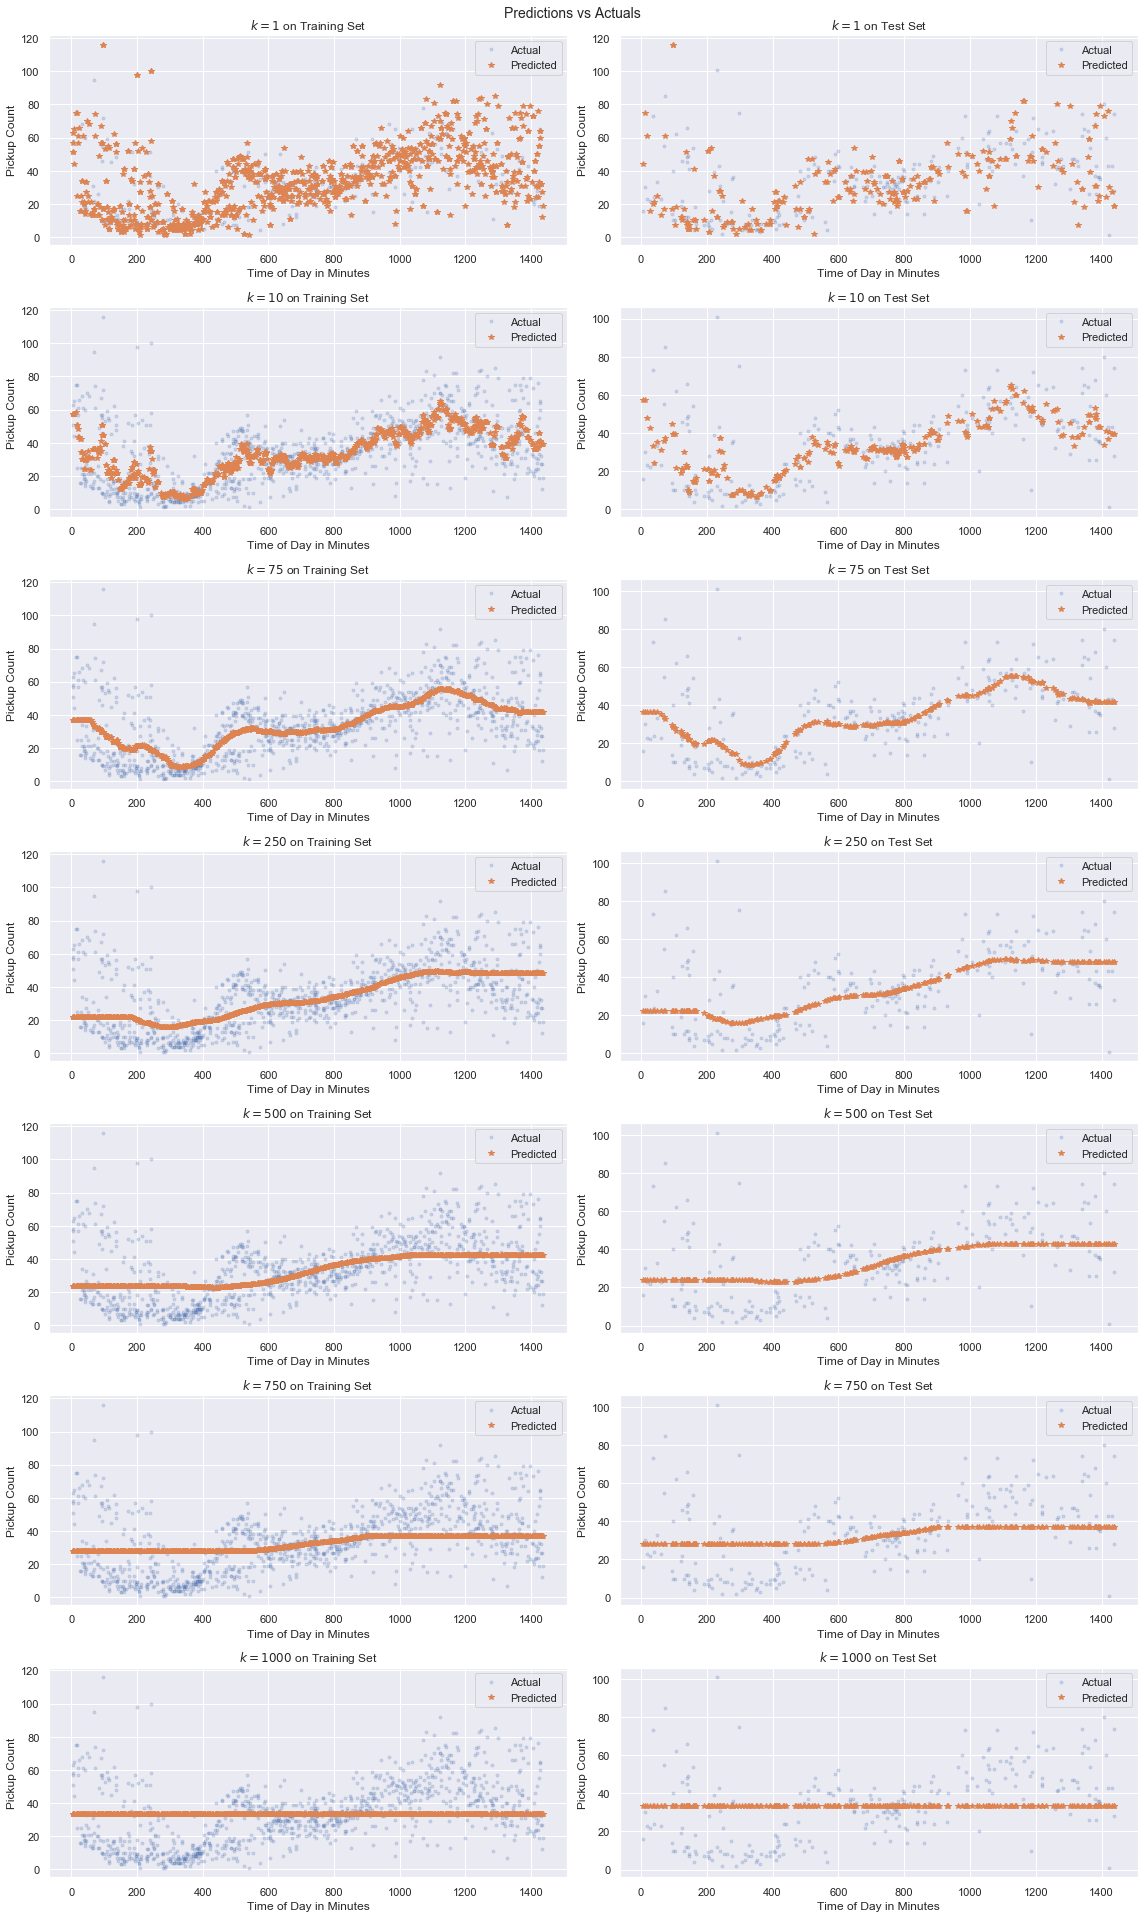

In [12]:
# Your code here
def plot_knn_prediction(ax, dataset, predictions, k, dataset_name= "Training"):
    
    # scatter plot actual
        ax.plot(dataset['TimeMin'], dataset['PickupCount'], '.', alpha=0.2, label='Actual')
    
    # scatter plot predictions
    ax.plot(dataset['TimeMin'], predictions, '*',  label='Predicted')
    
    # Set labels
    ax.set_title("$k = {}$ on {} Set".format(str(k), dataset_name))
    ax.set_xlabel('Time of Day in Minutes')
    ax.set_ylabel('Pickup Count')
    ax.legend()

    
# Notice that nrows is set to the variable size. This makes the code more readable and adaptable
fig, axes = plt.subplots(nrows=len(k_values), ncols=2, figsize=(16,28))
fig.suptitle('Predictions vs Actuals', fontsize=14)
for i, k in enumerate(k_values):
    plot_knn_prediction(axes[i][0], train_data, knn_predicted_pickups_train[k], k, "Training")
    plot_knn_prediction(axes[i][1], test_data, knn_predicted_pickups_test[k], k, "Test")

fig.tight_layout(rect=[0,0.03,1,0.98])

<div class="exercise"> <b> Question 2.3 </b> </div>

Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

In [13]:
# Your code here
knn_r2_train = {k : r2_score(train_data[['PickupCount']], knn_predicted_pickups_train[k]) for k in k_values}
knn_r2_test = { k : r2_score(test_data[['PickupCount']], knn_predicted_pickups_test[k]) for k in k_values}

# This format makes the display much more readable
knn_r2_df = pd.DataFrame(data = {"k" : tuple(knn_r2_train.keys()), 
                                    "Train R^2" : tuple(knn_r2_train.values()), 
                                    "Test R^2" : tuple(knn_r2_test.values())})


knn_r2_df

,k,Train R^2,Test R^2
0,1,0.712336,-0.418932
1,10,0.509825,0.272068
2,75,0.445392,0.390310
3,250,0.355314,0.340341
4,500,0.290327,0.270321
5,750,0.179434,0.164909
6,1000,0.000000,-0.000384


<div class="exercise"> <b> Question 2.4 </b> </div>

Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ plots on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

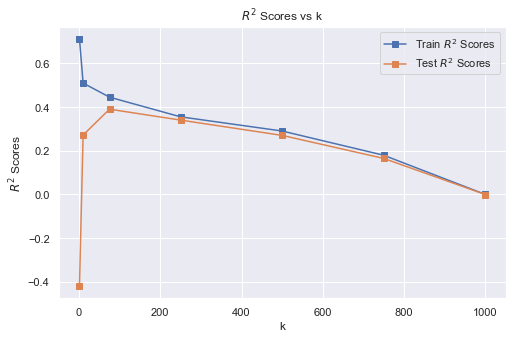

In [14]:
# Your code here

fig, axes = plt.subplots(figsize = (8,5))

axes.plot(knn_r2_df['k'], knn_r2_df['Train R^2'], 's-', label='Train $R^2$ Scores')
axes.plot(knn_r2_df['k'], knn_r2_df['Test R^2'], 's-', label='Test $R^2$ Scores')

axes.set_xlabel('k')
axes.set_ylabel('$R^2$ Scores')

# A generic title of this format (y vs x) is generally appropriate
axes.set_title("$R^2$ Scores vs k")

# Including a legend is very important
axes.legend();

<div class="exercise"> <b> Question 2.5 </b> </div>

Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?
6. Use the plots of the predictions (in 2.2) to justify why your choice of the best $k$ makes sense (**Hint**: think Goldilocks).

*Your answer here*
1. When the model uses k = n means the model is underfitting. Any data point chosen takes the category for the majority class.  
2. 𝑅^2 = 0 represents a model is no variance in the response variable around its mean.
3. R^2 becomes negative when the chosen model fits worse than the horizontal line. We can observe   this in test sets when k=1 and k=1000.
4. Yes. The plots for R^2 for training and test sets follow different trends. For training set, as k_value increases R^2 value decreases. R^2 value is maximum when k=0. For test set, R^2 value is minimum when k=0 and it increases as k increases until k=75 and then keeps on decreasing gradually.
5. The k=75 is the best value for k. The optimal/best k value is usually found approximately at the sqrt(N) where N is the total number of samples. R^2 values is maximum R^2= 0.390310 at the best k_value.
6. According to the plots, at k=75 the regression line starts getting visible which is the perfect scenario for training your model as at that value the data chosen for prediction is not too scattered nor already trained. 